In [2]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# <h2> 1.	Загрузите данные. Используйте датасет с ирисами. Его можно загрузить непосредственно из библиотеки Sklearn. В данных оставьте только 2 класса: Iris Versicolor, Iris Virginica.</h2> 

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
type( iris )

sklearn.utils.Bunch

In [4]:
# смотрим состав ключей
for key in iris.keys():
    print( key )

data
target
frame
target_names
DESCR
feature_names
filename
data_module


In [5]:
# смотрим состав полей за исключением даты
iris2 = {key:val for key,val in iris.items() if key != 'data'}
for key in iris2.keys():
    for values in iris2.values():
        print(key,values )

target [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
target None
target ['setosa' 'versicolor' 'virginica']
target .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean

In [6]:
# Смотрим на названия переменных
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
from pandas import DataFrame
iris_frame = DataFrame(iris.data)
# Делаем имена колонок такие же, как имена переменных:
iris_frame.columns = iris.feature_names
# Добавляем столбец с целевой переменной: 
iris_frame['target'] = iris.target
# Для наглядности добавляем столбец с сортами: 
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
# Смотрим, что получилось:
iris_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [14]:
# Удаляем поле name
iris_frame=iris_frame.drop(columns='name', axis=1)
# удаляем 1 параметр из цели
iris_frame2=iris_frame[(iris_frame.target != 0)]

In [15]:
# итоговый датасет
iris_frame2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


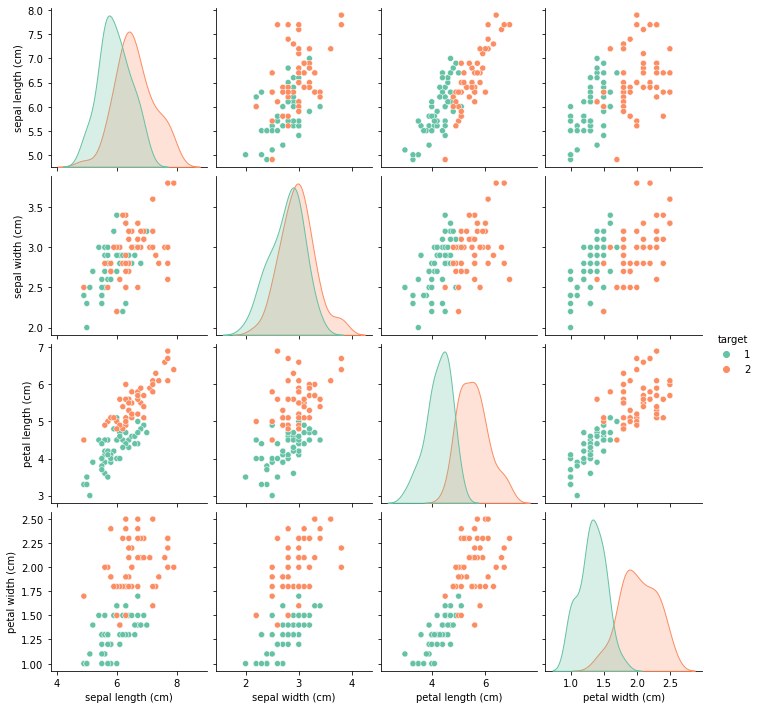

In [8]:
# строим график по 2 переменным
sns.pairplot(iris_frame2, hue="target",palette='Set2')

In [16]:
#нормализуем данные (от 0 до 1)
iris_frame3=(iris_frame2-iris_frame2.min ())/(iris_frame2.max ()-iris_frame2.min ())
iris_frame3

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,0.700000,0.666667,0.435897,0.266667,0.0
51,0.500000,0.666667,0.384615,0.333333,0.0
52,0.666667,0.611111,0.487179,0.333333,0.0
53,0.200000,0.166667,0.256410,0.200000,0.0
54,0.533333,0.444444,0.410256,0.333333,0.0
...,...,...,...,...,...
145,0.600000,0.555556,0.564103,0.866667,1.0
146,0.466667,0.277778,0.512821,0.600000,1.0
147,0.533333,0.555556,0.564103,0.666667,1.0
148,0.433333,0.777778,0.615385,0.866667,1.0


# <h2>2.	Самостоятельно реализуйте логистическую регрессию, без использования метода LogisticRegression из библиотеки. Можете использовать библиотеки pandas, numpy, math для реализации. Оформите в виде функции. *Оформите в виде класса с методами.</h2>

In [34]:
# для сравнения модель из библиотеки
from sklearn.linear_model import LogisticRegression

In [35]:
# Логистическая регрессия на Питон
class LogitRegression() :
    def __init__( self, learning_rate, iterations)  :        
        self.learning_rate = learning_rate        
        self.iterations = iterations
                   
    # Function for model training    
    def fit( self, X, Y ) :        
        # число экземпляров (строки) и параметров (столбцов)       
        self.m, self.n = X.shape        
        # веса        
        self.W = np.zeros( self.n ) # 0 вектор столбцов       
        self.b = 0        
        self.X = X        
        self.Y = Y
                  
                 
        for i in range( self.iterations ) :
            self.update_weights() # запускаем обновление весов
    
 
    def update_weights( self ) : 
        A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) )
            #t=self.t    
            # calculate gradients        
        tmp0 = ( A - self.Y.T )
        tmp = np.reshape( tmp0, self.m )        
        dW = np.dot( self.X.T, tmp ) / self.m         
        db = np.sum( tmp ) / self.m 
          
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db
               
    def predict( self, X ) :    
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )        
        Y = np.where( Z > 0.5, 1, 0 )            
        return Y
    
    def loss( self, X) :    
        #lists =list()
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )        
        Y = np.where( Z > 0.5, 1, 0 )
        Loss=np.mean(-Y*np.log(Z)-(1-Y)*np.log(1-Z))
        return Loss

  

 <h2>3.	Реализуйте метод градиентного спуска. Обучите логистическую регрессию этим методом. Выберете и посчитайте метрику качества. Метрика должна быть одинакова для всех пунктов домашнего задания. Для упрощения сравнения выберете только одну метрику.</h2>

In [36]:
from datetime import datetime 
import time
#time.sleep(3) 

# Driver code
def main() :
    start_time = datetime.now() 
    # Importing dataset    
    df = iris_frame3
    X = df.iloc[:,:-1].values # all the columns except the last 1 column
    Y = df.iloc[:,-1:].values

    # Splitting dataset into train and test set
    X_train, X_test, Y_train, Y_test = train_test_split(
      X, Y, test_size = 1/3, random_state = 0 )
    
    # print( Y_train)

    # Model training    
    model = LogitRegression( learning_rate = 0.01, iterations = 1000 )
    #запускаем функции класса  
    model.fit( X_train, Y_train )    
    model1 = LogisticRegression()    
    model1.fit( X_train, Y_train)
    L1=model.loss(X_train)
 
    # Prediction on test set
    Y_pred = model.predict( X_test )    
    Y_pred1 = model1.predict( X_test )
      
    # measure performance    
    correctly_classified = 0    
    correctly_classified1 = 0
      
    # counter    
    count = 0    
    for count in range( np.size( Y_pred ) ) :  
        
        if Y_test[count] == Y_pred[count] :            
            correctly_classified = correctly_classified + 1
          
        if Y_test[count] == Y_pred1[count] :            
            correctly_classified1 = correctly_classified1 + 1
              
        count = count + 1
          
    print( "Accuracy on test set by our model       :  ", ( 
      correctly_classified / count ) * 100 )
    print( "Accuracy on test set by sklearn model   :  ", ( 
      correctly_classified1 / count ) * 100 )
    print( "Потери   :  ",  
      (L1) ) 
    print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

  
if __name__ == "__main__" :     
    main()

Accuracy on test set by our model       :   85.29411764705883
Accuracy on test set by sklearn model   :   100.0
Потери   :   0.5685311731871484
Time elapsed (hh:mm:ss.ms) 0:00:00.053083


c:\Users\okho004\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# <h2>4.	Повторите п. 3 для метода скользящего среднего (Root Mean Square Propagation, RMSProp).</h2>

In [28]:
class LogitRegression() :
    def __init__( self, learning_rate, iterations, beta, eps ) :        
        self.learning_rate = learning_rate        
        self.iterations = iterations
        self.eps = eps
        self.beta = beta       
    # Function for model training    
    def fit( self, X, Y ) :        
        # no_of_training_examples, no_of_features (столбцов)       
        self.m, self.n = X.shape        
        # weight initialization        
        self.W = np.zeros( self.n ) # 0 вектор столбцов       
        self.b = 0        
        self.X = X        
        self.Y = Y
        self.v_w = 0
        self.v_b = 0
        #self.i = i
                  
        # gradient descent learning
                  
        for i in range( self.iterations ) :
            self.update_weights() # запускаем обновление весов
            
    def update_weights( self ) : 
        A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) )
            #t=self.t    
        # calculate gradients        
        tmp0 = ( A - self.Y.T )
        tmp = np.reshape( tmp0, self.m )        
        dW = np.dot( self.X.T, tmp ) / self.m         
        db = np.sum( tmp ) / self.m 
        
        self.v_w = self.beta * self.v_w + (1 - self.beta) * dW**2
        self.v_b = self.beta * self.v_b + (1 - self.beta) * db**2
        self.W = self.W - self.learning_rate * dW/(np.sqrt(self.v_w + self.eps))
        self.b = self.b - self.learning_rate * db/(np.sqrt(self.v_b + self.eps))
        
    def predict( self, X ) :    
        #lists =list()
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )        
        Y = np.where( Z > 0.5, 1, 0 )
        return Y
    
    def loss( self, X) :    
        #lists =list()
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )        
        Y = np.where( Z > 0.5, 1, 0 )
        Loss=np.mean(-Y*np.log(Z)-(1-Y)*np.log(1-Z))
        return Loss

In [29]:
from datetime import datetime 
import time
#time.sleep(3) 

# Driver code
def main() :
    start_time = datetime.now() 
    # Importing dataset    
    df = iris_frame3
    X = df.iloc[:,:-1].values # all the columns except the last 1 column
    Y = df.iloc[:,-1:].values

    # Splitting dataset into train and test set
    X_train, X_test, Y_train, Y_test = train_test_split(
      X, Y, test_size = 1/3, random_state = 0 )
    
    # print( Y_train)

    # Model training    
    model = LogitRegression( learning_rate = 0.01, iterations = 1000, beta=0.9, eps=1e-8)
    #запускаем функции класса  
    model.fit( X_train, Y_train )    
    model1 = LogisticRegression()    
    model1.fit( X_train, Y_train)
    L1=model.loss(X_train)
 
    # Prediction on test set
    Y_pred = model.predict( X_test )    
    Y_pred1 = model1.predict( X_test )
      
    # measure performance    
    correctly_classified = 0    
    correctly_classified1 = 0
      
    # counter    
    count = 0    
    for count in range( np.size( Y_pred ) ) :  
        
        if Y_test[count] == Y_pred[count] :            
            correctly_classified = correctly_classified + 1
          
        if Y_test[count] == Y_pred1[count] :            
            correctly_classified1 = correctly_classified1 + 1
              
        count = count + 1
          
    print( "Accuracy on test set by our model       :  ", ( 
      correctly_classified / count ) * 100 )
    print( "Accuracy on test set by sklearn model   :  ", ( 
      correctly_classified1 / count ) * 100 )
    print( "Потери   :  ",  
      (L1) ) 
    print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

  
if __name__ == "__main__" :     
    main()

Accuracy on test set by our model       :   94.11764705882352
Accuracy on test set by sklearn model   :   100.0
Потери   :   0.10153510665183589
Time elapsed (hh:mm:ss.ms) 0:00:00.047727


c:\Users\okho004\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<h2>5.	Повторите п. 3 для ускоренного по Нестерову метода адаптивной оценки моментов (Nesterov–accelerated Adaptive Moment Estimation, Nadam).</h2>

In [30]:
class LogitRegression() :
    def __init__( self, learning_rate, iterations, gamma) :        
        self.learning_rate = learning_rate        
        self.iterations = iterations
        #self.eps = eps
        #self.beta = beta
        self.gamma = gamma
    # Function for model training    
    def fit( self, X, Y ) :        
        # no_of_training_examples, no_of_features (столбцов)       
        self.m, self.n = X.shape        
        # weight initialization        
        self.W = np.zeros( self.n ) # 0 вектор столбцов       
        self.b = 0        
        self.X = X        
        self.Y = Y
        self.v_w = 0
        self.v_b = 0
        #self.i = i
                  
        # gradient descent learning
                  
        for i in range( self.iterations ) :
            self.update_weights() # запускаем обновление весов
            
    # Helper function to update weights in gradient descent
 
    def update_weights( self ) : 
        A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) )
            #t=self.t    
        # calculate gradients        
        tmp0 = ( A - self.Y.T )
        tmp = np.reshape( tmp0, self.m )        
                
        #compute the look ahead value
        self.W = self.W - self.gamma * self.v_w
        self.b = self.b - self.gamma * self.v_b
         
        dW = np.dot( self.X.T, tmp ) / self.m         
        db = np.sum( tmp ) / self.m  
            
       #Now move further in the opposite direction of that gradient
        #w = w — eta * dw
        #b = b — eta * db
 
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db
      
        self.v_w = self.gamma * self.v_w + self.learning_rate * dW
        self.v_b = self.gamma * self.v_b + self.learning_rate * db  
        
    def predict( self, X ) :    
        #lists =list()
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )        
        Y = np.where( Z > 0.5, 1, 0 )
        return Y
    def loss( self, X) :    
        #lists =list()
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )        
        Y = np.where( Z > 0.5, 1, 0 )
        Loss=np.mean(-Y*np.log(Z)-(1-Y)*np.log(1-Z))
        return Loss

In [31]:
from datetime import datetime 
import time
#time.sleep(3) 

# Driver code
def main() :
    start_time = datetime.now() 
    # Importing dataset    
    df = iris_frame3
    X = df.iloc[:,:-1].values # all the columns except the last 1 column
    Y = df.iloc[:,-1:].values

    # Splitting dataset into train and test set
    X_train, X_test, Y_train, Y_test = train_test_split(
      X, Y, test_size = 1/3, random_state = 0 )
    
    # print( Y_train)

    # Model training    
    model = LogitRegression( learning_rate = 0.01, iterations = 1000, gamma=0.9)
    #запускаем функции класса  
    model.fit( X_train, Y_train )    
    model1 = LogisticRegression()    
    model1.fit( X_train, Y_train)
    L1=model.loss(X_train)
 
    # Prediction on test set
    Y_pred = model.predict( X_test )    
    Y_pred1 = model1.predict( X_test )
      
    # measure performance    
    correctly_classified = 0    
    correctly_classified1 = 0
      
    # counter    
    count = 0    
    for count in range( np.size( Y_pred ) ) :  
        
        if Y_test[count] == Y_pred[count] :            
            correctly_classified = correctly_classified + 1
          
        if Y_test[count] == Y_pred1[count] :            
            correctly_classified1 = correctly_classified1 + 1
              
        count = count + 1
          
    print( "Accuracy on test set by our model       :  ", ( 
      correctly_classified / count ) * 100 )
    print( "Accuracy on test set by sklearn model   :  ", ( 
      correctly_classified1 / count ) * 100 )
    print( "Потери   :  ",  
      (L1) ) 
    print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

  
if __name__ == "__main__" :     
    main()

Accuracy on test set by our model       :   97.05882352941177
Accuracy on test set by sklearn model   :   100.0
Потери   :   0.2595867615353872
Time elapsed (hh:mm:ss.ms) 0:00:00.073095


c:\Users\okho004\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# <h2>6.	Сравните значение метрик для реализованных методов оптимизации. Можно оформить в виде таблицы вида |метод|метрика|время работы| (время работы опционально). Напишите вывод.</h2>

# <h3>Из датасета удалены лишние столбцы, проведена нормализация данных. Построена логистическая регрессия для 3 вариантов, а также проведено сравнение с программным продуктом.Результаты следующие:
Градиентный спуск:
Точность нашей модели :  85.29 %
Размер ошибки :  56.85
time elapsed (hh:mm:ss:ms) 0:00:00.050867

RMSProp:
Точность нашей модели      :   94.11764705882352
Потери   :   0.10153510665183589
Time elapsed (hh:mm:ss.ms) 0:00:00.047727

Nadam:
Точность нашей модели       :   97.05882352941177
Accuracy on test set by sklearn model   :   100.0
Потери   :   0.2595867615353872
Time elapsed (hh:mm:ss.ms) 0:00:00.073095

Наилучший результат показал метод Нестерова.

Для улучшения модели планируется также: Реализовать 3 метода в одном классе. 
Построить визуализацию изменения параметров и переменных  по итерациям.</h3>